# Voting
Based on the idea that classifiers can complement each other,  
Aggregating individual classifier's prediction to make better prediction.

In [19]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load mnist dataset

In [20]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2)

# single classifiers accuracy on mnist
build decision tree, knn, svm and check accuracy on MNIST data.

In [21]:
dtree = tree.DecisionTreeClassifier(
    criterion="gini", max_depth=8, max_features=32,random_state=35)

dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003,
          probability=True,random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [22]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.7972222222222223
knn   :  0.8416666666666667
svm   :  0.85


we can easily do soft voting or hard voting using sklearn's voting classifier    
when you want to implement soft voting by scratch, you can use predict_proba just like below,  
Below is the example of SVM's prediction (digit 0 to 9) on two MNIST data.

In [23]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[9.95557918e-01 3.42018637e-04 4.57700824e-04 4.19160266e-04
  4.21146304e-04 7.99436984e-04 4.11439277e-04 6.08753549e-04
  4.33211441e-04 5.49214707e-04]
 [2.86586264e-03 4.17512273e-03 4.28013091e-03 4.14650212e-03
  9.27814553e-01 2.24791840e-02 3.06764221e-03 9.50855980e-03
  1.51437526e-02 6.51868962e-03]]


# hard voting
hard voting is just majority vote which collects each classifier's prediction and take the most voted prediction.

In [24]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)], 
    weights=[1,1,1], voting='hard').fit(X_train, y_train)
hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

/anaconda3/envs/wikiml/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9083333333333333

# soft voting
soft voting takes each classifier's predict_proba and then sum up all probabilities to take the prediction has highest probabilities.

In [25]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)], 
    weights=[1,1,1], voting='soft').fit(X_train, y_train)
soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

/anaconda3/envs/wikiml/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9138888888888889

# Visualization
we can visualize accuracy to check voting result is stabled or better than single model accuracy.  
it is hard to say which voting is better, but we can confirm classifiers complement each other,  
and voting result is better in this example.

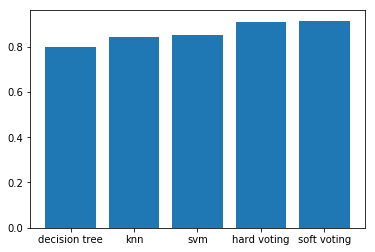

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);